# Interaction of gammas in Xenon

In [1]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy.testing as npt
from operator import itemgetter, attrgetter
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

2017-12-16 19:38:06


In [2]:
from math import sqrt, pi

In [3]:
from pynext.system_of_units import *

In [4]:
from pynext.Material import GXe

In [5]:
def mu_vs_e(npdata):
    return npdata[:,0] * MeV, npdata[:,1] * (cm2/g)

In [6]:
def latt(mu_over_rho, rho):
    mu = mu_over_rho * rho
    return 1 / mu

In [10]:
def select_energy(npdata, ene=0.5):
    return npdata[np.where(npdata[:,0] > ene)[0]]
   

In [27]:
def print_latt(densities):
    
    ug = g/cm3
    ukg = kg/m3
    ordered = sorted([ (name, r) for (name, r) in densities ],
                     key=itemgetter(1))
    
    for name, rho in ordered:
        xe = PhysicalMaterial(name='GXe', rho=rho, mu_over_rho=0.039 * cm2/g)
        print("""for xenon gas at density rho ={:7.2f} Latt (2.5 MeV) = {:7.2f} m.""".format(
                 rho / (g/cm3), xe.Latt /m))




In [28]:
def transmittance_and_absorption_at_qbb(densities):
    
    ug = g/cm3
    ukg = kg/m3
    ordered = sorted([ (name, r) for (name, r) in densities ],
                     key=itemgetter(1))
    
    for name, rho in ordered:
        xe = PhysicalMaterial(name='GXe', rho=rho, mu_over_rho=0.039 * cm2/g)
       
        for L in (1*m, 2*m, 3*m):
            print("""for xenon gas at density rho {:7.2f} g/cm3
                 for detector vessel of length {:7.2f} m
                 Latt (2.5 MeV) = {:7.2f} m
                 Fraction of gammas (2.5 MeV) not interacting = {:7.2f}
                 Fraction of gammas (2.5 MeV) not interacting = {:7.2f}
                 """.format(rho/(g/cm3), L /m, xe.Latt/m,
                           xe.transmittance_at_qbb(L), xe.absorption_at_qbb(L) ))




In [15]:
xe = GXe()

## Xenon mass atenuation coefficient

In [7]:
xenp = np.loadtxt('../data/mass_att_coeff.txt', comments='#', usecols=(0,1))

In [8]:
e, mu_over_rho = mu_vs_e(xenp)

In [11]:
e2, mu_over_rho2 = mu_vs_e(select_energy(xenp, ene=1))

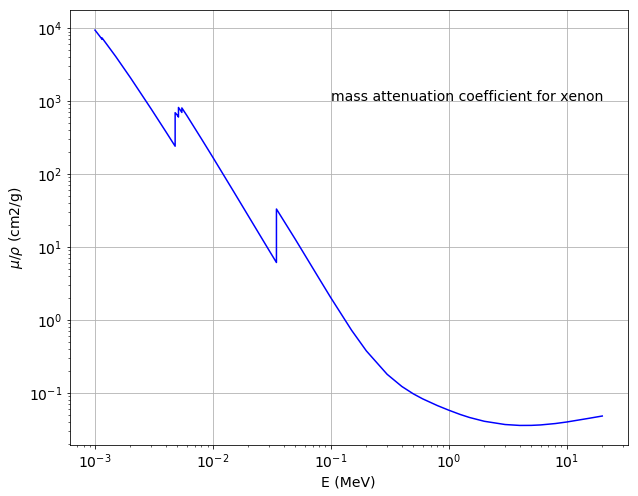

In [12]:
plt.loglog(e / MeV, mu_over_rho / (cm2/g),'b')
plt.grid(True)
plt.xlabel('E (MeV)')
plt.ylabel(r'$\mu/\rho$ (cm2/g)')
plt.text(0.1, 1000, r'mass attenuation coefficient for xenon')
plt.show()

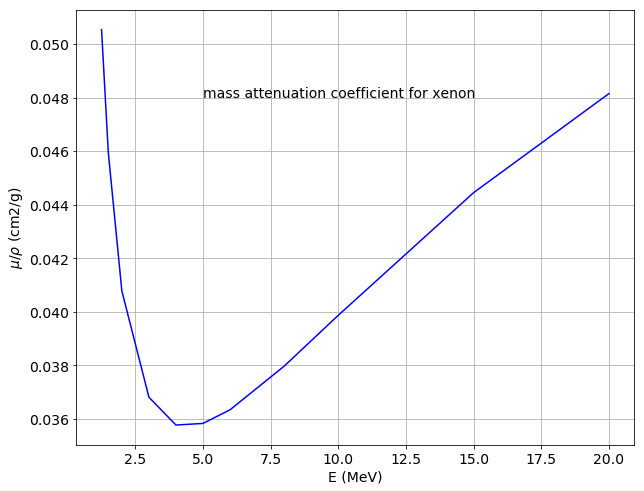

In [19]:
plt.plot(e2 / MeV, mu_over_rho2 / (cm2/g),'b')
plt.grid(True)
plt.xlabel('E (MeV)')
plt.ylabel(r'$\mu/\rho$ (cm2/g)')
plt.text(5, 0.048, r'mass attenuation coefficient for xenon')
plt.show()

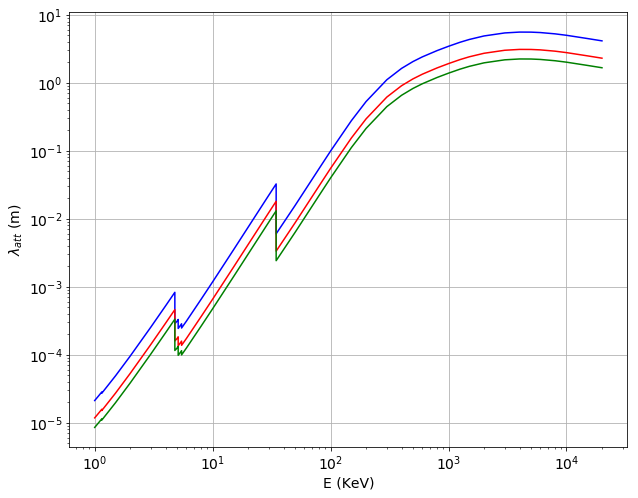

In [16]:
plt.loglog(e / keV, latt(mu_over_rho, xe.rho['rho_0920']) / m, 'b')
plt.loglog(e / keV, latt(mu_over_rho, xe.rho['rho_1520']) / m, 'r')
plt.loglog(e / keV, latt(mu_over_rho, xe.rho['rho_2020']) / m, 'g')
plt.grid(True)
plt.xlabel('E (KeV)')
plt.ylabel(r'$\lambda_{att}$ (m)')
#plt.text(10**3, 0.1, r'$\lambda_{att}$ (m) for xenon at $\rho =${} g/cm3'.format(rho_0920 / (g/cm3)))
plt.show()

## Attenuation length as a function of density and size

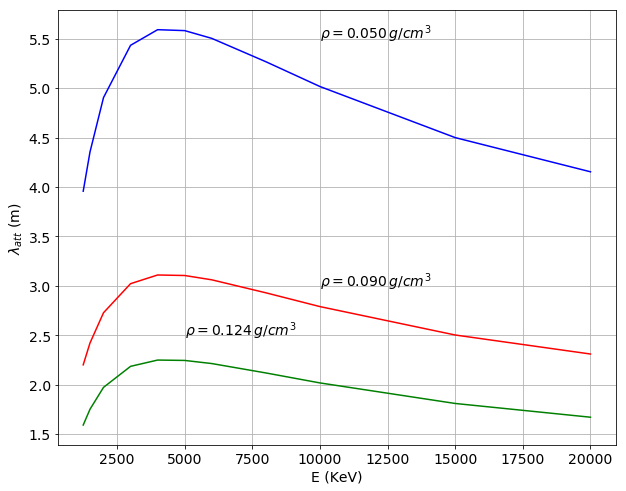

In [24]:
plt.plot(e2 / keV, latt(mu_over_rho2, xe.rho['rho_0920']) / m, 'b')
plt.plot(e2 / keV, latt(mu_over_rho2, xe.rho['rho_1520']) / m, 'r')
plt.plot(e2 / keV, latt(mu_over_rho2, xe.rho['rho_2020']) / m, 'g')
plt.grid(True)
plt.xlabel('E (KeV)')
plt.ylabel(r'$\lambda_{att}$ (m)')
plt.text(10000, 5.5, r'$\rho={0:5.3f} \, g/cm^3$'.format(xe.rho['rho_0920']/ (g/cm3)))
plt.text(10000, 3, r'$\rho={0:5.3f} \, g/cm^3$'.format(xe.rho['rho_1520']  / (g/cm3)))
plt.text(5000, 2.5, r'$\rho={0:5.3f} \, g/cm^3$'.format(xe.rho['rho_2020']  / (g/cm3)))
plt.show()

## Fraction of interactions as a function of density and size

In [25]:
L = np.arange(0.5, 3.5, 0.1) * m
I0520 = np.array([xe.xed['rho_0520'].absorption_at_qbb(l) for l in L])
I1020 = np.array([xe.xed['rho_1020'].absorption_at_qbb(l) for l in L])
I2020 = np.array([xe.xed['rho_2020'].absorption_at_qbb(l) for l in L])

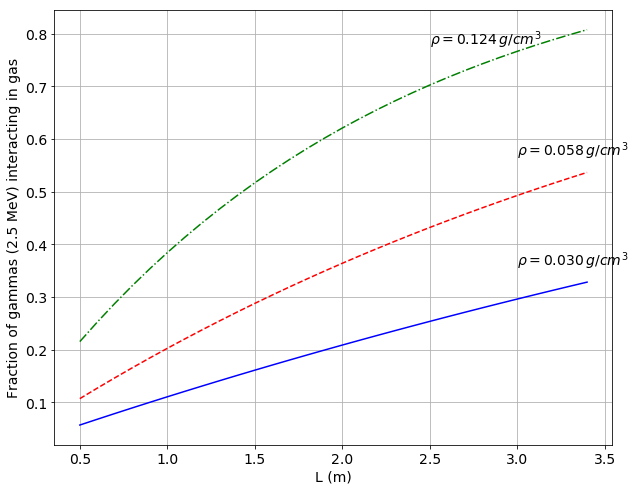

In [26]:
plt.plot(L / m, I0520,'b')
plt.plot(L / m, I1020,'r--')
plt.plot(L / m, I2020,'g-.')
plt.grid(True)
plt.xlabel('L (m)')
plt.ylabel('Fraction of gammas (2.5 MeV) interacting in gas')
plt.text(2.5, 0.78, r'$\rho={0:5.3f} \, g/cm^3$'.format(xe.rho['rho_2020']/ (g/cm3)))
plt.text(3, 0.57, r'$\rho={0:5.3f} \, g/cm^3$'.format(xe.rho['rho_1020']  / (g/cm3)))
plt.text(3, 0.36, r'$\rho={0:5.3f} \, g/cm^3$'.format(xe.rho['rho_0520']  / (g/cm3)))
plt.show()